In [1]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plot_params = {}
sim_params = {}

plot_params['s']        = 0.2
plot_params['lim1']     = -80
plot_params['lim2']     = 80
plot_params['wnum']     = 500
plot_params['time_val'] = 0

kappa_sweep = np.linspace(4.3, 43, plot_params['wnum'])

kappa_val_num = 0
casc_t = np.zeros((len(kappa_sweep), plot_params['wnum']), dtype=complex)
for kappa_value in kappa_sweep:
    # Cavity 1
    sim_params['k']     = kappa_value
    sim_params['k1']    = sim_params['k']/2
    sim_params['k2']    = sim_params['k']/2
    sim_params['gnd']   = 1
    sim_params['g']     = 5                       # rabi frequency
    sim_params['gamma'] = 0.043           # emitter linewidth
    sim_params['Gc']    = 0                             # additional loss channel
    sim_params['we']    = 0                             # emmiter detuning
    sim_params['wc']    = 0                             # cavity detuning
    sim_params['N']     = 1                             # number of emmiters 
    jvec = np.zeros(int((sim_params['N']-1)*sim_params['N']/2))   
    sim_params['jvec']  = jvec                          # dipole-dipole coupling 
    sim_params['We']    = sim_params['we']*np.ones((1,sim_params['N']))

    pt1 = PhotonTransmission(plot_params, sim_params)
    x_1, y1_1, y2_1 = pt1.calc_first_subspace()

    # Cavity 2
    sim_params['k']     = kappa_value
    sim_params['k1']    = sim_params['k']/2
    sim_params['k2']    = sim_params['k']/2
    sim_params['gnd']   = 1
    sim_params['g']     = 5                       # rabi frequency
    sim_params['gamma'] = 0.043           # emitter linewidth
    sim_params['Gc']    = 0                             # additional loss channel
    sim_params['we']    = 0                             # emmiter detuning
    sim_params['wc']    = 0                             # cavity detuning
    sim_params['N']     = 1                             # number of emmiters    
    jvec = np.zeros(int((sim_params['N']-1)*sim_params['N']/2))
    sim_params['jvec']  = jvec                          # dipole-dipole coupling 
    sim_params['We']    = sim_params['we']*np.ones((1,sim_params['N']))

    pt2 = PhotonTransmission(plot_params, sim_params)
    x_2, y1_2, y2_2 = pt2.calc_first_subspace()

    # Cascaded Transmission Behaviour 
    for j in range(len(y1_1)):
        S1 = np.array([[y1_1[j], np.conj(y2_1[j])], [y2_1[j], np.conj(y1_1[j])]])
        S2 = np.array([[y1_2[j], np.conj(y2_2[j])], [y2_2[j], np.conj(y1_2[j])]])
        
        inter1 = S1@np.array([[1],[0]])
        out = S2@inter1
        
        casc_t[kappa_val_num][j] = out[0]
    
    kappa_val_num += 1

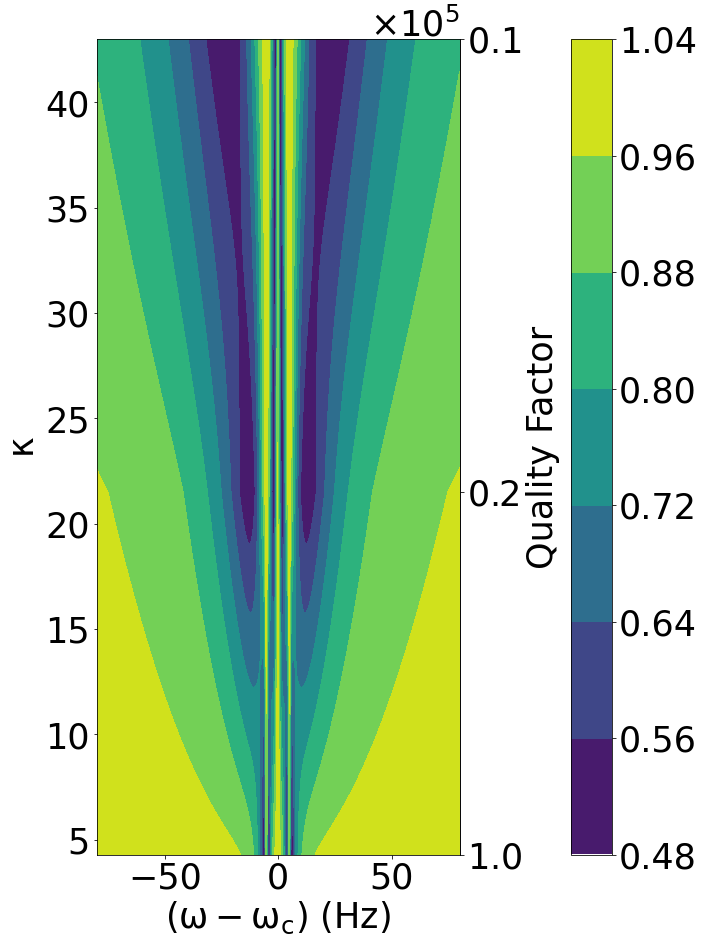

In [5]:
import matplotlib.ticker

X, Kappa_sweep = np.meshgrid(x_1, kappa_sweep)

fig = plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(111)

plt.rcParams.update({'font.size': 35})
plt.rcParams.update({'mathtext.default':  'regular' })
mappable = ax1.contourf(X, Kappa_sweep, casc_t)
fig.colorbar(mappable, pad=0.2)


def kappa_to_Q(x):
    try:
        return 430000/x
    except:
        return 430000/x[1:]

def Q_to_kappa(x):
    try:
        return 430000/x
    except:
        return 430000/x[1:]

secax_y = ax1.secondary_yaxis(
    'right', functions=(kappa_to_Q, Q_to_kappa))
# secax_y.set_yscale("log")
secax_y.set_ylabel('Quality Factor')
secax_y.set_yticks([1e5, 2e4, 1e4])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
secax_y.yaxis.set_major_formatter(formatter) 
# secax_y.set_yscale("log")

# ax2.set_yticks()
# print(ax1.get_yticks()[1:])

# ax2_scale = 430000/ax1.get_yticks()[1:]
# # ax2_scale.append(0)
# print(ax2_scale)
# ax2.set_yticks(ax2_scale)
# ax2.yaxis.set_major_formatter(FuncFormatter(lambda x,pos: f"{finv(x):.2f}"))
# ax.set_xlabel('Z')
plt.ylabel('$\kappa$')
plt.xlabel('$(\omega-\omega_{c})$ (Hz)')
plt.savefig('continuous_k.svg')
# plt.show()

In [3]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plot_params = {}
sim_params = {}

plot_params['s']        = 0.2
plot_params['lim1']     = -80
plot_params['lim2']     = 80
plot_params['wnum']     = 500
plot_params['time_val'] = 0

kappa_sweep = [4.3,21.5, 43]

kappa_val_num = 0
casc_t = np.zeros((len(kappa_sweep), plot_params['wnum']), dtype=complex)
for kappa_value in kappa_sweep:
    # Cavity 1
    sim_params['k']     = kappa_value
    sim_params['k1']    = sim_params['k']/2
    sim_params['k2']    = sim_params['k']/2
    sim_params['gnd']   = 1
    sim_params['g']     = 5                       # rabi frequency
    sim_params['gamma'] = 0.043           # emitter linewidth
    sim_params['Gc']    = 0                             # additional loss channel
    sim_params['we']    = 0                             # emmiter detuning
    sim_params['wc']    = 0                             # cavity detuning
    sim_params['N']     = 1                             # number of emmiters 
    jvec = np.zeros(int((sim_params['N']-1)*sim_params['N']/2))   
    sim_params['jvec']  = jvec                          # dipole-dipole coupling 
    sim_params['We']    = sim_params['we']*np.ones((1,sim_params['N']))

    pt1 = PhotonTransmission(plot_params, sim_params)
    x_1, y1_1, y2_1 = pt1.calc_first_subspace()

    # Cavity 2
    sim_params['k']     = kappa_value
    sim_params['k1']    = sim_params['k']/2
    sim_params['k2']    = sim_params['k']/2
    sim_params['gnd']   = 1
    sim_params['g']     = 5                       # rabi frequency
    sim_params['gamma'] = 0.043           # emitter linewidth
    sim_params['Gc']    = 0                             # additional loss channel
    sim_params['we']    = 0                             # emmiter detuning
    sim_params['wc']    = 0                             # cavity detuning
    sim_params['N']     = 1                             # number of emmiters    
    jvec = np.zeros(int((sim_params['N']-1)*sim_params['N']/2))
    sim_params['jvec']  = jvec                          # dipole-dipole coupling 
    sim_params['We']    = sim_params['we']*np.ones((1,sim_params['N']))

    pt2 = PhotonTransmission(plot_params, sim_params)
    x_2, y1_2, y2_2 = pt2.calc_first_subspace()

    # Cascaded Transmission Behaviour 
    for j in range(len(y1_1)):
        S1 = np.array([[y1_1[j], np.conj(y2_1[j])], [y2_1[j], np.conj(y1_1[j])]])
        S2 = np.array([[y1_2[j], np.conj(y2_2[j])], [y2_2[j], np.conj(y1_2[j])]])
        
        inter1 = S1@np.array([[1],[0]])
        out = S2@inter1
        
        casc_t[kappa_val_num][j] = out[0]
    
    kappa_val_num += 1

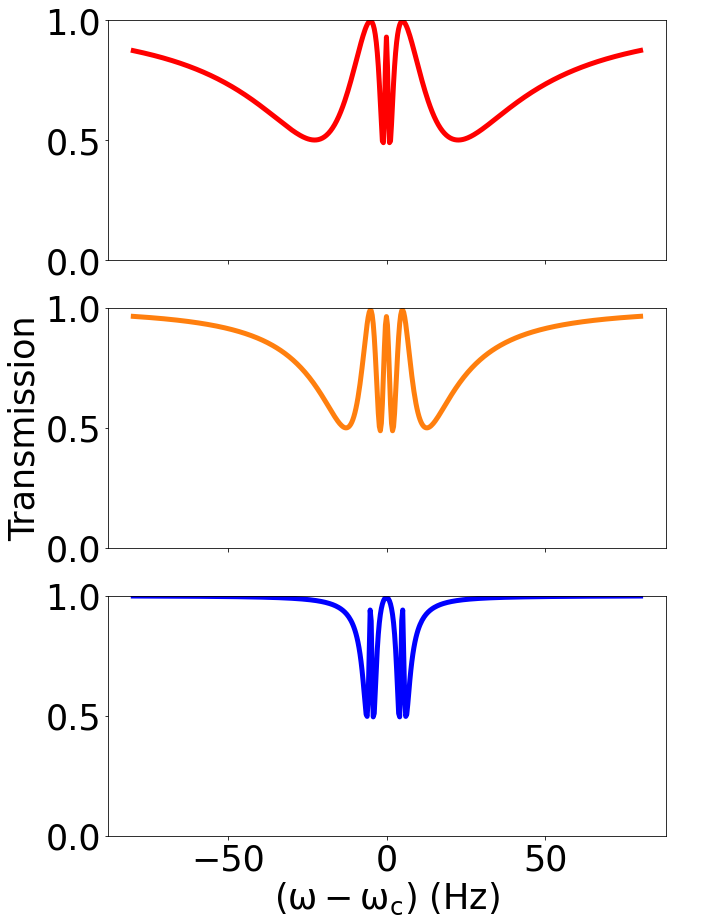

In [4]:
fig, axs = plt.subplots(len(casc_t), sharex=True, sharey=True, figsize=(10, 15))
x = x_1

colors = ['b', 'tab:orange', 'r']

for i in range(len(casc_t)):
    axs[(len(casc_t)-1)-i].plot(x, casc_t[i], colors[i], linewidth=5)
    axs[(len(casc_t)-1)-i].set_ylim([0,1])

fig.add_subplot(111, frameon=False)

fig.add_subplot(111, frameon=False)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams.update({'font.size': 35})
plt.ylabel('Transmission')
plt.xlabel('$(\omega-\omega_{c})$ (Hz)')
plt.savefig("discrete_k.svg")